In [1]:
from utils.data_loading import CombustionSystemDataset

PATH = 'Zare_data/combustion_img_13.mat'

test_data = CombustionSystemDataset(PATH,'test_set_x','test_set_y')

In [73]:
index = 200
image = test_data.data[index]
label = test_data.labels[index]

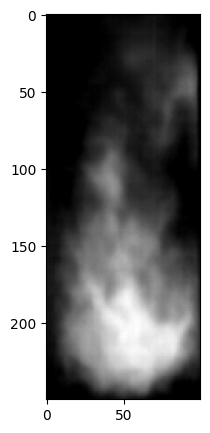

In [74]:
import numpy as np
import matplotlib.pyplot as plt

test_image = np.resize(image,(250,100))
plt.figure(figsize=(20,5))
plt.imshow(test_image, cmap='gray')
plt.show()

In [65]:
from torch.utils.data import DataLoader
dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

# Iterate over the DataLoader to access the data
for batch_idx, (data_batch, label_batch) in enumerate(dataloader):
    print(data_batch)

tensor([[51, 58, 65,  ...,  0,  0,  0],
        [ 5,  8, 11,  ...,  0,  0,  0],
        [27, 30, 33,  ...,  0,  0,  0],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]], dtype=torch.uint8)
tensor([[38, 47, 49,  ...,  0,  0,  0],
        [58, 70, 79,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        ...,
        [ 2,  5,  5,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]], dtype=torch.uint8)
tensor([[50, 58, 65,  ...,  0,  0,  0],
        [36, 46, 50,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        ...,
        [23, 30, 31,  ...,  1,  0,  0],
        [ 0,  0,  2,  ...,  0,  0,  0],
        [63, 74, 84,  ...,  0,  0,  0]], dtype=torch.uint8)
tensor([[20, 27, 31,  ...,  0,  0,  0],
        [24, 28, 30,  ...,  0,  0,  0],
        [26, 32, 34,  ...,  1,  0,  0],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        

KeyboardInterrupt: 

In [79]:
import torchvision.transforms as transforms
from torch import optim, nn, utils, Tensor
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import lightning as L

ContextualVersionConflict: (Pygments 2.11.2 (c:\users\mhzar\anaconda3\envs\hw3\lib\site-packages), Requirement.parse('pygments<3.0.0,>=2.13.0'), {'rich'})

In [78]:



# define any number of nn.Modules (or use your current ones)
encoder = nn.Sequential(nn.Linear(28 * 28, 64), nn.ReLU(), nn.Linear(64, 3))
decoder = nn.Sequential(nn.Linear(3, 64), nn.ReLU(), nn.Linear(64, 28 * 28))


# define the LightningModule
class LitAutoEncoder(L.LightningModule):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = nn.functional.mse_loss(x_hat, x)
        # Logging to TensorBoard (if installed) by default
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer


# init the autoencoder
autoencoder = LitAutoEncoder(encoder, decoder)

ContextualVersionConflict: (Pygments 2.11.2 (c:\users\mhzar\anaconda3\envs\hw3\lib\site-packages), Requirement.parse('pygments<3.0.0,>=2.13.0'), {'rich'})